In [1]:
# dot product of keyphrase comparison (weighted)

### Installation script
```
conda create -n ner python=3.6
source activate ner
conda install -c conda-forge spacy -y
conda install ipython jupyter nb_conda nltk numpy matplotlib -y
conda install -c conda-forge rake_nltk -y
python -m spacy download en
python -m spacy download en_core_web_sm
python -m spacy download en_core_web_lg
```

# Testing sample code

rake_nltk keywords

In [2]:
from rake_nltk import Rake

# Uses stopwords for english from NLTK, and all puntuation characters by
# default
r = Rake()

# Extraction given the text.
r.extract_keywords_from_text("In August 2018, adhesive replicas of President Donald Trump's recently-destroyed star were placed on the Walk of Fame on Hollywood Boulevard.")

# # Extraction given the list of strings where each string is a sentence.
# r.extract_keywords_from_sentences(<list of sentences>)

# To get keyword phrases ranked highest to lowest.
print(r.get_ranked_phrases())

# To get keyword phrases ranked highest to lowest with scores.
print(r.get_ranked_phrases_with_scores())

['president donald trump', 'hollywood boulevard', 'destroyed star', 'august 2018', 'adhesive replicas', 'walk', 'recently', 'placed', 'fame']
[(9.0, 'president donald trump'), (4.0, 'hollywood boulevard'), (4.0, 'destroyed star'), (4.0, 'august 2018'), (4.0, 'adhesive replicas'), (1.0, 'walk'), (1.0, 'recently'), (1.0, 'placed'), (1.0, 'fame')]


In [3]:
r1 = Rake()
r1.extract_keywords_from_text("In August 2018, adhesive replicas of President Donald Trump's recently-destroyed star were placed on the Walk of Fame on Hollywood Boulevard.")
r1_scored = r1.get_ranked_phrases_with_scores()

In [4]:
r2 = Rake()
r2.extract_keywords_from_text("Someone pasted stars for Donald Trump.")
r2_scored = r2.get_ranked_phrases_with_scores()

spaCy vectors

In [5]:
import spacy
import numpy as np
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_lg')
tokens = nlp(u'dog cat banana Obama')

for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)
    print(np.shape(token.vector))
    plt.plot(token.vector)

/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/ner/lib/python3.6/importlib/_bootstrap.p

dog True 7.0336733 False
(300,)
cat True 6.6808186 False
(300,)
banana True 6.700014 False
(300,)
Obama True 7.414071 False
(300,)


# Comparing phrases with max-min pooled word vectors

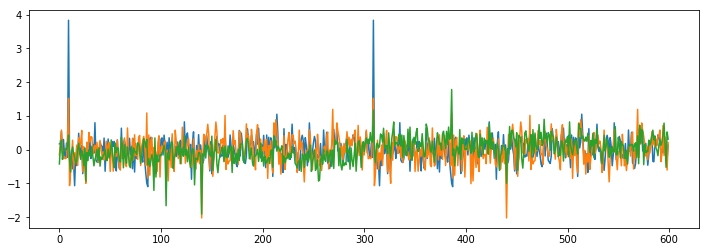

In [6]:
import numpy as np


# tokens1 = nlp(u'President')
# tokens2 = nlp(u'Obama')
# tokens3 = nlp(u'Trump Jr')

def phrase_vect(text):
    tokens = nlp(text)
    maxpool = np.maximum.reduce([token.vector for token in tokens])
    minpool = np.minimum.reduce([token.vector for token in tokens])
    # https://stackoverflow.com/questions/21816433/
    result = np.concatenate((minpool,maxpool))
    return result

# def phrase_vect(tokens):
#     maxpool = np.maximum.reduce([token.vector for token in tokens])
#     minpool = np.minimum.reduce([token.vector for token in tokens])
#     result = np.concatenate((minpool,maxpool))
#     plt.plot(result)
#     return result
    
vector1 = phrase_vect(u'President')
vector2 = phrase_vect(u'Obama')
vector3 = phrase_vect(u'Trump Jr')

plt.figure(figsize=(12,4))
plt.plot(vector1)
plt.plot(vector2)
plt.plot(vector3)


In [7]:
def cosine(u,v):
#     print(np.shape(u))
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

In [8]:
cosine(vector1,vector2)

0.4542843

In [9]:
# ok building a color plot instead

In [10]:
phrase_list = [
    "President of the United States",
    "POTUS",
    "President",
    "President Obama",
    "Barack Obama",
    "Obama",
    "Osama",
    "President Clinton",
    "Bill Clinton",
    "Clinton",
    "Hillary Clinton",
    "Hillary",
    "Trump",
    "Trump Jr",
    "Donald Trump",
    "President Trump",
    "Ice Cream",
    "Lee Kuan Yew",
    "Python",
    "Singapore"
]

In [11]:
def meshgrid(x,y): # DW code !!!
    return (
        [[x_ for x_ in x] for  _ in y],
        [[y_ for  _ in x] for y_ in y])

pair_mesh = meshgrid(phrase_list, phrase_list)
value_mesh = meshgrid([0]*len(phrase_list), [0]*len(phrase_list))

import numpy as np
for i,_ in enumerate(pair_mesh[0]):
    for j,_ in enumerate(pair_mesh[0][0]): 
        phrase1 = pair_mesh[0][i][j]
        phrase2 = pair_mesh[1][i][j]
        
#         tokens1 = nlp(phrase1)
#         tokens2 = nlp(phrase2)
        
        vector1 = phrase_vect(phrase1)
        vector2 = phrase_vect(phrase2)
        
        value_mesh[0][i][j] = cosine(vector1, vector2)

(20, 20)


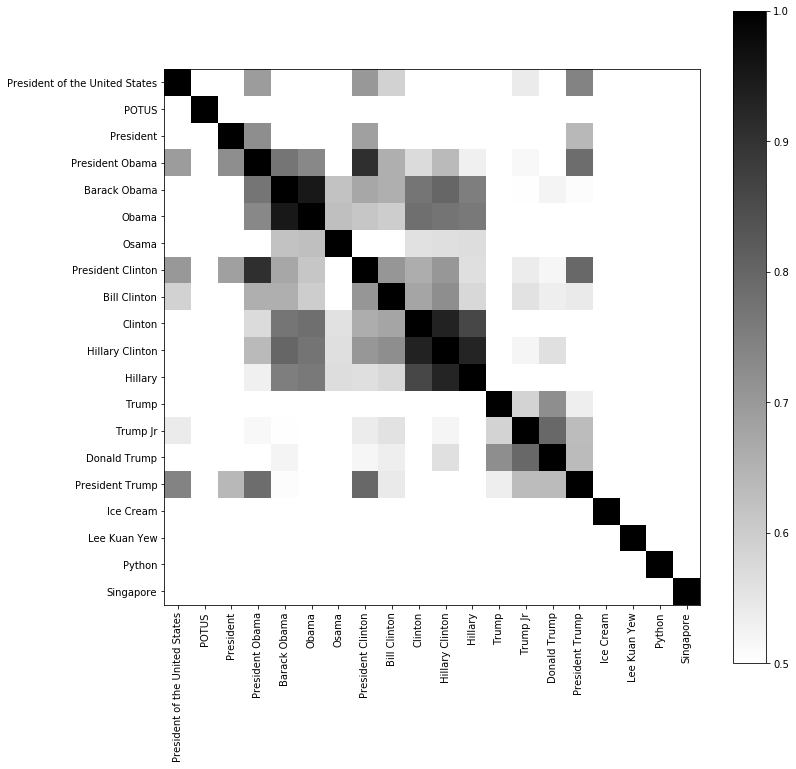

In [12]:
import matplotlib.pyplot as plt
print(np.shape(value_mesh[0]))
# fig, ax = plt.subplots(1,1)

# ax.imshow(value_mesh[0])
plt.figure(figsize=(12,12))
plt.imshow(np.transpose(value_mesh[0]), cmap='gray_r')
plt.clim(0.5,1)
plt.yticks(np.arange(len(phrase_list)), phrase_list)
plt.xticks(np.arange(len(phrase_list)), phrase_list, rotation='vertical')
plt.colorbar()
plt.show()

## Comparing claim with text


In [13]:
claim = "Obama is born in Kenya."
text = "Kenya born Obama is a secret Muslim and he is taking our guns away."

In [14]:
r1 = Rake()
r1.extract_keywords_from_text(claim)
r1_scored = r1.get_ranked_phrases_with_scores()
print(r1_scored)

r2 = Rake()
r2.extract_keywords_from_text(text)
r2_scored = r2.get_ranked_phrases_with_scores()
print(r2_scored)

[(1.0, 'obama'), (1.0, 'kenya'), (1.0, 'born')]
[(9.0, 'kenya born obama'), (4.0, 'secret muslim'), (4.0, 'guns away'), (1.0, 'taking')]


In [15]:
# assign vectors
r1_scored_vec = [[claim_keyword_tuple[0], 
                  claim_keyword_tuple[1], 
                  phrase_vect(claim_keyword_tuple[1])] for claim_keyword_tuple in r1_scored]
print(len(r1_scored_vec))
print(len(r1_scored_vec[0]))

r2_scored_vec = [[text_keyword_tuple[0], 
                  text_keyword_tuple[1], 
                  phrase_vect(text_keyword_tuple[1])] for text_keyword_tuple in r2_scored]
print(len(r1_scored_vec))
print(len(r1_scored_vec[0]))

3
3
3
3


In [16]:
# compare statements

pair_mesh = meshgrid(r1_scored_vec, r2_scored_vec)
value_mesh = meshgrid([0]*len(r1_scored_vec), [0]*len(r2_scored_vec))

import numpy as np
for i,_ in enumerate(pair_mesh[0]):
    for j,_ in enumerate(pair_mesh[0][0]): 
        vector1 = pair_mesh[0][i][j][2]
        vector2 = pair_mesh[1][i][j][2]
        
        value_mesh[0][i][j] = cosine(vector1, vector2)

In [17]:
print([keyword_tuple[1] for keyword_tuple in r1_scored_vec])

['obama', 'kenya', 'born']


(4, 3)


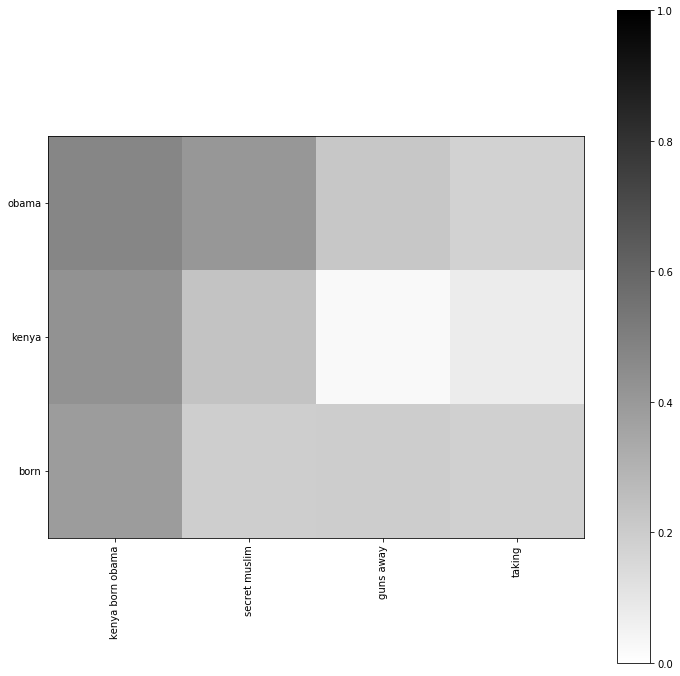

In [18]:
import matplotlib.pyplot as plt
print(np.shape(value_mesh[0]))
# fig, ax = plt.subplots(1,1)

# ax.imshow(value_mesh[0])
plt.figure(figsize=(12,12))
plt.imshow(np.transpose(value_mesh[0]), cmap='gray_r')
plt.clim(0,1)
plt.yticks(np.arange(len(r1_scored_vec)), 
           [keyword_tuple[1] for keyword_tuple in r1_scored_vec])
plt.xticks(np.arange(len(r2_scored_vec)), 
           [keyword_tuple[1] for keyword_tuple in r2_scored_vec], 
           rotation='vertical')
plt.colorbar()
plt.show()

In [19]:
print(value_mesh)

([[0.4746019, 0.42620227, 0.3895841], [0.4071502, 0.23273118, 0.1951612], [0.22066991, 0.027125161, 0.19647107], [0.17757007, 0.07460439, 0.18565258]], [[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]])


In [20]:
def calculate_similarity_score(value_mesh):
    similarity_array = np.maximum.reduce([row for row in value_mesh[0]])
    weighted_similarity = np.multiply(similarity_array, [keyword_tuple[0] for keyword_tuple in r1_scored])
    weighted_similarity_sum = np.sum(weighted_similarity)
    sum_of_weights = np.sum([keyword_tuple[0] for keyword_tuple in r1_scored])
    weighted_similarity_sum_over_weights = weighted_similarity_sum/sum_of_weights
    return weighted_similarity_sum_over_weights

In [21]:
print(calculate_similarity_score(value_mesh))

0.4301294187704722


In [22]:
# Without preprocessing

In [23]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
from rake_nltk import Rake

nlp = spacy.load('en_core_web_lg')

def calculate_similarity_score(value_mesh, r1_scored, r2_scored):
    similarity_array = np.maximum.reduce([row for row in value_mesh[0]])
    weighted_similarity = np.multiply(similarity_array, [keyword_tuple[0] for keyword_tuple in r1_scored])
    weighted_similarity_sum = np.sum(weighted_similarity)
    sum_of_weights = np.sum([keyword_tuple[0] for keyword_tuple in r1_scored])
    weighted_similarity_sum_over_weights = weighted_similarity_sum/sum_of_weights
    return weighted_similarity_sum_over_weights

def phrase_vect(text):
    tokens = nlp(text)
    maxpool = np.maximum.reduce([token.vector for token in tokens])
    minpool = np.minimum.reduce([token.vector for token in tokens])
    # https://stackoverflow.com/questions/21816433/
    result = np.concatenate((minpool,maxpool))
    return result

def meshgrid(x,y): # DW code !!!
    return (
        [[x_ for x_ in x] for  _ in y],
        [[y_ for  _ in x] for y_ in y])

def cosine(u,v):
#     print(np.shape(u))
    return np.dot(u,v)/(np.linalg.norm(u)*np.linalg.norm(v))

def calculate_claim_text(claim, text):
    r1 = Rake()
    r1.extract_keywords_from_text(claim)
    r1_scored = r1.get_ranked_phrases_with_scores()
    print(r1_scored)

    r2 = Rake()
    r2.extract_keywords_from_text(text)
    r2_scored = r2.get_ranked_phrases_with_scores()
    print(r2_scored)
    
    # assign vectors
    r1_scored_vec = [[claim_keyword_tuple[0],  # keyword score
                      claim_keyword_tuple[1],  # keyword phrase
#                       claim_keyword_tuple[1].split(), # list of keyword
#                       len(claim_keyword_tuple[1].split()), # number of keyword
                      phrase_vect(claim_keyword_tuple[1])] for claim_keyword_tuple in r1_scored]
    print(len(r1_scored_vec))
    print(len(r1_scored_vec[0]))

    r2_scored_vec = [[text_keyword_tuple[0], 
                      text_keyword_tuple[1], 
                      phrase_vect(text_keyword_tuple[1])] for text_keyword_tuple in r2_scored]
    print(len(r1_scored_vec))
    print(len(r1_scored_vec[0]))
    
    
    # compare statements

    pair_mesh = meshgrid(r1_scored_vec, r2_scored_vec)
    value_mesh = meshgrid([0]*len(r1_scored_vec), [0]*len(r2_scored_vec))
    
    for i,_ in enumerate(pair_mesh[0]):
        for j,_ in enumerate(pair_mesh[0][0]): 
            vector1 = pair_mesh[0][i][j][2]
            vector2 = pair_mesh[1][i][j][2]

            value_mesh[0][i][j] = cosine(vector1, vector2)
            
    plt.figure(figsize=(12,12))
    plt.imshow(np.transpose(value_mesh[0]), cmap='gray_r')
    plt.clim(0,1)
    plt.yticks(np.arange(len(r1_scored_vec)), 
               [keyword_tuple[1] for keyword_tuple in r1_scored_vec])
    plt.xticks(np.arange(len(r2_scored_vec)), 
               [keyword_tuple[1] for keyword_tuple in r2_scored_vec], 
               rotation='vertical')
    plt.colorbar()
    plt.show()
            
    print(calculate_similarity_score(value_mesh, r1_scored, r2_scored))


In [24]:
"This is bad.".split()

['This', 'is', 'bad.']

[(9.0, 'donald trump mocked'), (4.0, 'disabled reporter')]
[(4.0, 'made fun'), (4.0, 'donald trump'), (4.0, 'disabled person'), (1.0, 'see'), (1.0, 'idiot')]
2
3
2
3


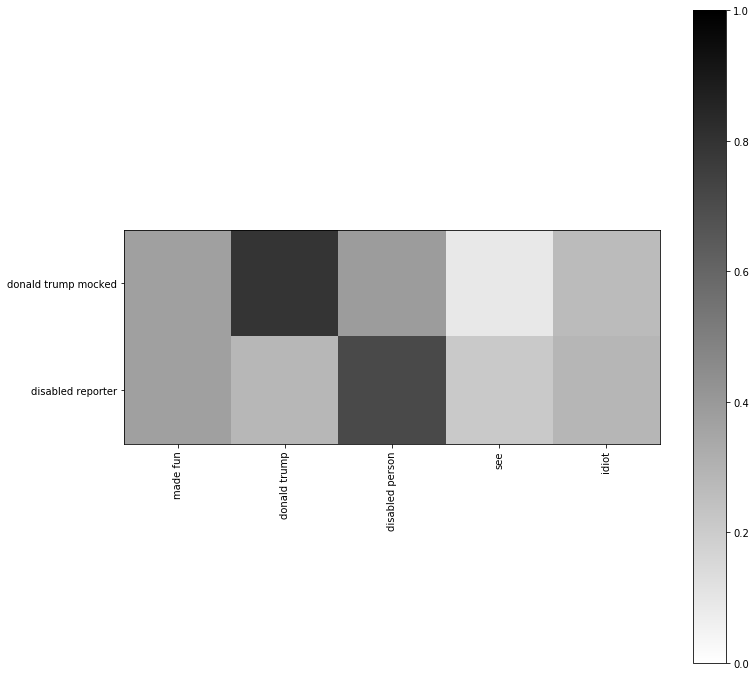

0.7698465310610257


In [25]:
claim = "Donald trump mocked a disabled reporter."
text = "We can see how Donald Trump is an idiot from how he made fun of the disabled person."
calculate_claim_text(claim, text)